# Gaussian beam

The idea is to solve the paraxial wave equation
$$ (\nabla^2+k^2) \psi = 0 $$

In cyclindrical we take $E(r,z) = u(r,z)e^{-jkz}$ and then we have to solve the equation: 

$$  \frac{\partial^2 u}{\partial r^2}+\frac{1}{r} \frac{\partial u}{\partial r} + \frac{\partial^2 u}{\partial z^2}- 2jk\frac{\partial u}{\partial z} =0 $$

Now the assumption of the paraxial approximation is that the field wont depend on the $\partial z^2$, because the changes compared with k are neglectables, so the term with $\partial z$ will dominate... At the end we need to deal with: 

$$  \frac{\partial^2 u}{\partial r^2}+\frac{1}{r} \frac{\partial u}{\partial r}- 2jk\frac{\partial u}{\partial z} =0 $$

And then use the ansatz $u(r,z) = A(z) exp\left(\frac{-jkr^2}{2q(z)} \right) $ and start to solve the damn equation (I wont do it)..

At the end it arrives to the following expression:

$$ E(r,z) = \left( \frac{2}{\pi w^2} \right)^{0.5} exp\left(  -\frac{r^2}{w^2} - jkz - \frac{j\pi r^2}{\lambda R} + j\phi_0 \right) $$

Where there are several terms to explain.... $w$ is the beams radius and it depends on z as:
$$w = w_0 \left[ 1+  \left(\frac{\lambda z}{\pi w_0^2} \right)^2 \right]^{0.5} $$

$w_0$ is the beam waist, that is the minimum value and it is where the radius of curvature is infinite (ie we have a plane wave at that posiiton). Then the curvature starts to increase, following the equation:

$$R = z+\frac{1}{z} \left( \frac{\pi w_0^2}{\lambda} \right)^2 $$


The term $\phi_0$ is the the gaussian beam phase shift and is defined as:
$$ tan(\phi_0) = \frac{\lambda z}{\pi w_0^2} $$


The previous equations can be described using the confocal distance parameter $\mathcal{z_c}$

$$z_c = \frac{\pi w_0^2}{\lambda} $$

$$R = z+\frac{z_c^2}{z}$$

$$w = w_0 \left[ 1+ \left( \frac{z}{z_c} \right)^2 \right]^{0.5} $$

$$\phi_0 = tan^{-1}(z/z_c) $$


Also the confocal distance divide two areas, when you have $z<< z_c$ you are nearby the beam waist, the curvature is big and the beam radius is near the value of the beam waist, we said that the beam is collimated in that region. When $z>>z_c$ then the beam radius growths linearly with the distance and the propagation starts to be spherical.




4.191690043903364e-06


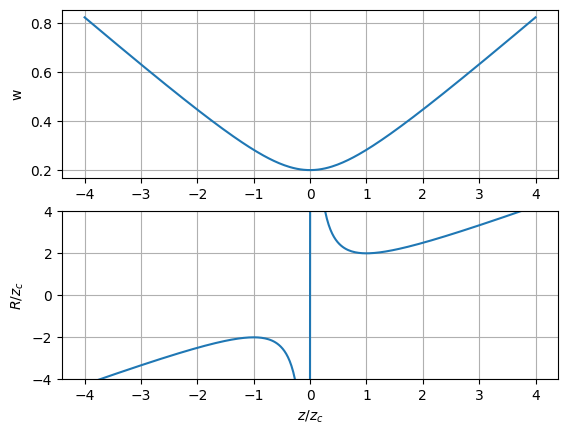

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as apu
import astropy.constants as cte

def beam_radius(wavel, w0, z):
        z_c = np.pi*w0**2/wavel
    w = w0*np.sqrt(1+(z/z_c)**2)
    return w

def curvature_radii(walve, w0,z):
    z_c = np.pi*w0**2/wavel
    R = z+z_c**2/z
    return R

###
### hyper parameters
###
w0 = 0.2*apu.mm
freq = 10*apu.GHz
wavel = cte.c/freq


zc = np.pi*w0**2/wavel
print(zc.to_value(apu.m))
z = np.linspace(-4*zc,4*zc, 256)

###
###
###



w = beam_radius(wavel, w0, z)
R = curvature_radii(wavel, w0,z)

fig, axes = plt.subplots(2,1)
axes[0].plot(z/zc, w.to_value(apu.mm))
axes[1].plot(z/zc, R/zc)
axes[1].set_xlabel("$z/z_c$")
axes[1].set_ylabel("$R/z_c$")
axes[1].set_ylim(-4,4)
axes[0].set_ylabel("w")
axes[0].grid()
axes[1].grid()


In the previous plot we can see that the at the beam wais the curvature is infinite  and it got is smaller value at $z=z_c$ also the beam radius is at its minimum then we say that the beam is collimated in that are.

After passed the confocal distance the beam radius growths like a linear function. Because of that in the far field the asymptotic beam growth angle is defined as:
$$ \theta_0 \approx \frac{\lambda}{\pi w_0} $$

Another usefull definition is the edge tapper $T_e$ that is the relative power density at a given radius $r_e$ and has the following relation
$$T_e = exp \left( \frac{-2r_e^2}{w^2} \right) $$

Normally is expressed in dB as $T_e (dB) = -10*log(T_e)$ and the relation is $T_e(dB) = 8.686(r_e/w)^2$

The equation for the cartesian coordinates are similar:

$$E(x,y,z) = \left( \frac{2}{\pi w_x w_y} \right)^{0.5} exp \left( \frac{-x^2}{w_x^2} \frac{-y^2}{w_y^2} -\frac{j\pi x^2}{\lambda R_x} -\frac{j\pi y^2}{\lambda R_y} + \frac{j}{2}(\phi_{0x}+\phi_{0y}) -jkz  \right) $$

with:

$$w_i = w_{0i} \left[ 1+ \left( \frac{\lambda}{\pi w_{0i}^2} \right)^2 \right] $$

$$R_i = z+\frac{1}{z}\left( \frac{\pi w_{0i}^2}{\lambda} \right) $$

$$\phi_{0i} = arctan\left( \frac{\lambda z}{\pi w_{0i}^2} \right)$$


### higher order solutions
You can allow to have more modes, in cylindricals means the appereance of Laguerre polynomials $L_{pm}$ and in cartesian Hermite polynomials  $H_m$. The solutions are way more awfull so I wont write them, this is just to state their existance.

### paraxial limits
The rule of thumbs to use the paraxial approx are:
- $w_0/\lambda >0.9$ and this is equivalent to have $\theta_0 < 20^{\circ}$